<a href="https://colab.research.google.com/github/shrish1366/Heart_disease_prediction/blob/main/project2_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease (1).csv


In [ ]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

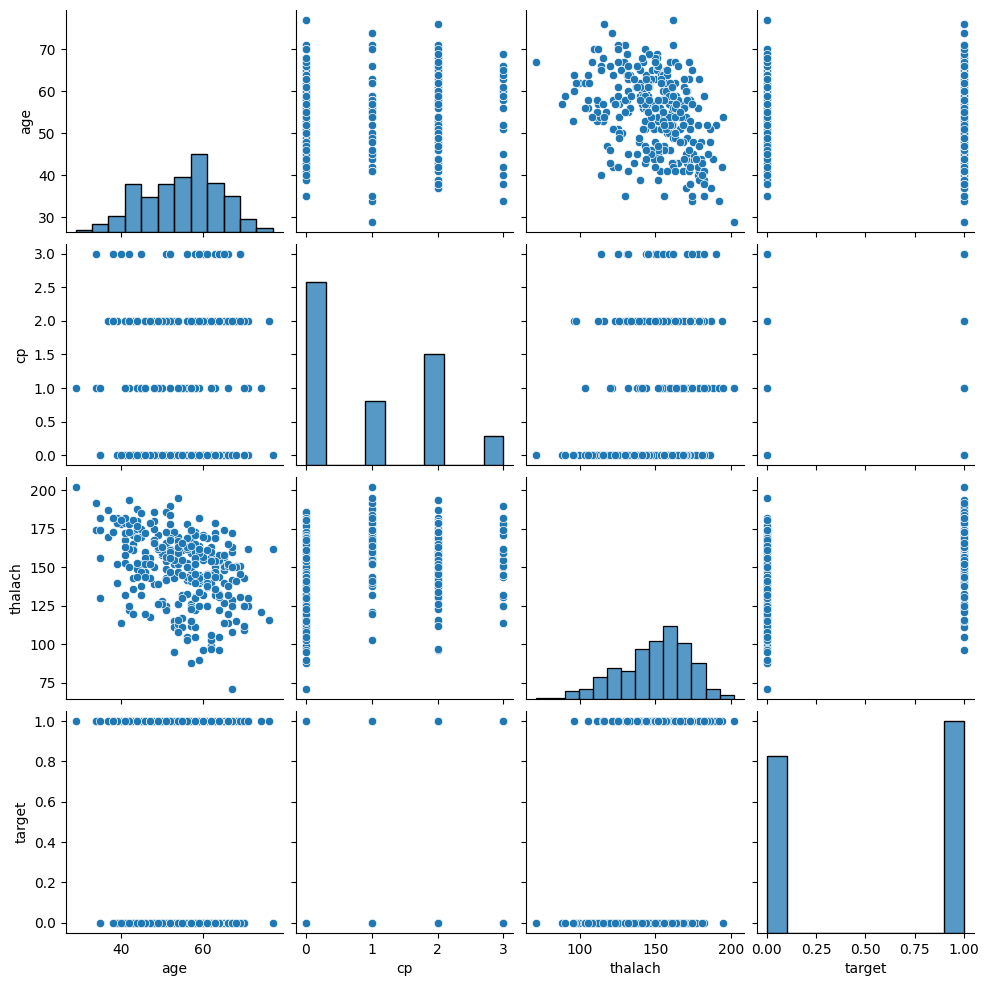

In [ ]:
print(df.describe()) #check summary statistic
sns.pairplot(df[['age', 'cp', 'thalach', 'target']])
plt.show()

In [ ]:
#feature and target selection
X  = df[['age', 'cp', 'thalach']] # independent variable bcz it's input
y = df['target'] # dependent variable bcz it's output


In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predictions and performance metrics
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] #[:,1] select all column except 1 because it is target function means output

In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
#user input function for prediction
def predict_heart_disease():
  age = int(input("Enter age: "))
  cp = int(input("Enter chest pain type (0-3): "))
  thalach = int(input("Enter maximum heart rate achieved: "))
  user_data  = pd.DataFrame({'age': [age], 'cp': [cp], 'thalach': [thalach]})
  prediction = model.predict(user_data)
  result = "Heart Disease" if prediction[0] == 1 else "No Heart Disease"
  print(f"Prediction: {result}")

In [ ]:
# call the user input function to test
predict_heart_disease()

Enter age: 21
Enter chest pain type (0-3): 0
Enter maximum heart rate achieved: 45
Prediction: No Heart Disease
